# Expl. 2-2) Wine recognition dataset



In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

##### 1) 모델 학습, 수행

In [8]:
wine = load_wine()
data_wine = wine.data
label_wine = wine.target

# Wine recognition dataset
- data description : https://scikit-learn.org/stable/datasets/toy_dataset.html#optical-recognition-of-handwritten-digits-dataset


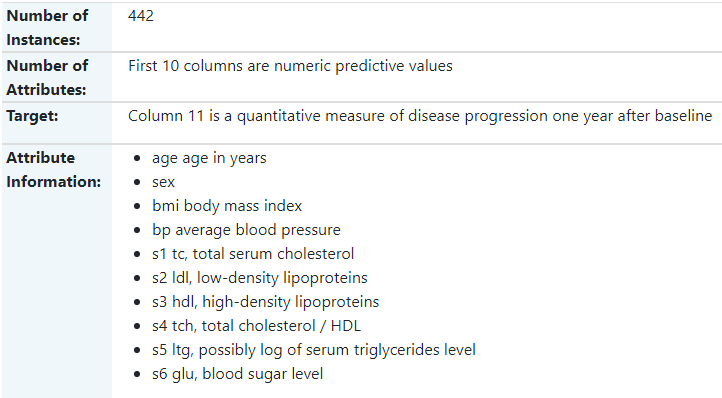

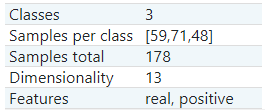

In [9]:
print(wine.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [10]:
# Feature Data 지정하기
print(wine.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [11]:
# Label Data 지정하기
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [12]:
# Target Names 출력해 보기
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [13]:
# 데이터 Describe 해 보기
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

##### 2) 데이터 분리 (train, test)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data_wine, label_wine, test_size=0.2, random_state=1)

print(x_train)
print(x_test)
print(y_train)
print(y_test)


[[1.200e+01 1.510e+00 2.420e+00 ... 1.050e+00 2.650e+00 4.500e+02]
 [1.272e+01 1.810e+00 2.200e+00 ... 1.160e+00 3.140e+00 7.140e+02]
 [1.208e+01 1.390e+00 2.500e+00 ... 9.300e-01 3.190e+00 3.850e+02]
 ...
 [1.349e+01 1.660e+00 2.240e+00 ... 9.800e-01 2.780e+00 4.720e+02]
 [1.293e+01 2.810e+00 2.700e+00 ... 7.700e-01 2.310e+00 6.000e+02]
 [1.305e+01 1.650e+00 2.550e+00 ... 1.120e+00 2.510e+00 1.105e+03]]
[[1.369e+01 3.260e+00 2.540e+00 2.000e+01 1.070e+02 1.830e+00 5.600e-01
  5.000e-01 8.000e-01 5.880e+00 9.600e-01 1.820e+00 6.800e+02]
 [1.242e+01 1.610e+00 2.190e+00 2.250e+01 1.080e+02 2.000e+00 2.090e+00
  3.400e-01 1.610e+00 2.060e+00 1.060e+00 2.960e+00 3.450e+02]
 [1.364e+01 3.100e+00 2.560e+00 1.520e+01 1.160e+02 2.700e+00 3.030e+00
  1.700e-01 1.660e+00 5.100e+00 9.600e-01 3.360e+00 8.450e+02]
 [1.221e+01 1.190e+00 1.750e+00 1.680e+01 1.510e+02 1.850e+00 1.280e+00
  1.400e-01 2.500e+00 2.850e+00 1.280e+00 3.070e+00 7.180e+02]
 [1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 

##### 3) 모델 학습, 수행

### Decision Tree

In [17]:
decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.80      0.92      0.86        13
           2       1.00      0.78      0.88         9

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.90      0.89      0.89        36



### Random Forest


In [19]:
random_forest = RandomForestClassifier(random_state=10)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



array([[14,  0,  0],
       [ 1, 12,  0],
       [ 0,  0,  9]])

### SVM


In [20]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.58      0.85      0.69        13
           2       0.20      0.11      0.14         9

    accuracy                           0.64        36
   macro avg       0.57      0.58      0.56        36
weighted avg       0.62      0.64      0.61        36



array([[11,  0,  3],
       [ 1, 11,  1],
       [ 0,  8,  1]])

### SGD Classifier


In [24]:
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.55      0.92      0.69        13
           2       0.00      0.00      0.00         9

    accuracy                           0.67        36
   macro avg       0.47      0.59      0.51        36
weighted avg       0.53      0.67      0.58        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[12,  2,  0],
       [ 1, 12,  0],
       [ 1,  8,  0]])

### Logistic Regression

In [22]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.87      1.00      0.93        13
           2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[13,  1,  0],
       [ 0, 13,  0],
       [ 0,  1,  8]])

- 예측 결과 해석 ,모델의 성능을 평가하는 지표 선정

모델별 정확도<br>
Decision Tree : 0.89<br>
Random Forest : 0.97<br>
SVM : 0.64<br>
SGD Classifier: 0.67<br>
Logistic Regression : 0.94<br>

Random Forest가 가장 적절하다.<br>
target에 대해 sensitivity, precision, f1 scored이 평균적으로 모두 높았다.<br>
와인의 경우 sensitivity, precision 중에 우선 순위를 두기 보다는<br>
accuracy가 높고, sensitivity, precision 수치가 균형적으로 높은것이 좋은 것으로 보인다.<br>

따라서 sensitivity, precision, f1 score 수치가 중요한것으로 생각된다.
